In [1]:
#objective1:
import pandas as pd 
listings=pd.read_csv("Listings.csv" , encoding="ISO-8859-1" , low_memory=False
)

In [2]:
listings.head()


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,03-12-2011,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,29-11-2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,31-07-2014,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,17-12-2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,14-12-2014,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [3]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [4]:
listings["host_since"] = pd.to_datetime(listings["host_since"], dayfirst=True, errors='coerce')
listings.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [5]:
paris_listings = listings.query("city == 'Paris'")[["host_since", "neighbourhood", "city", "accommodates", "price"]]
paris_listings.info()




<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [6]:
paris_listings.isna() .sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [7]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [8]:
paris_listings.query("price == 0 and accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [9]:
#objective 2:
paris_listings_neighbourhood=(
  paris_listings
  .groupby("neighbourhood")
  .agg({"price":"mean"})
  .sort_values("price")
)
paris_listings_neighbourhood.tail()


,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [10]:
paris_listings_accommodates=(
  paris_listings
  .query("neighbourhood == 'Elysee'")
  .groupby("accommodates")
  .agg({"price":"mean"})
  .sort_values("price")
)
paris_listings_accommodates.head()


,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [11]:
paris_listings_over_time=(
  paris_listings
  .set_index("host_since")
  .resample("Y")
  .agg(
   { "neighbourhood": "count" ,
    "price": "mean"}
    )
)
paris_listings_over_time.head()


C:\Users\Jay\AppData\Local\Temp\ipykernel_11940\3249794026.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample("Y")


,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


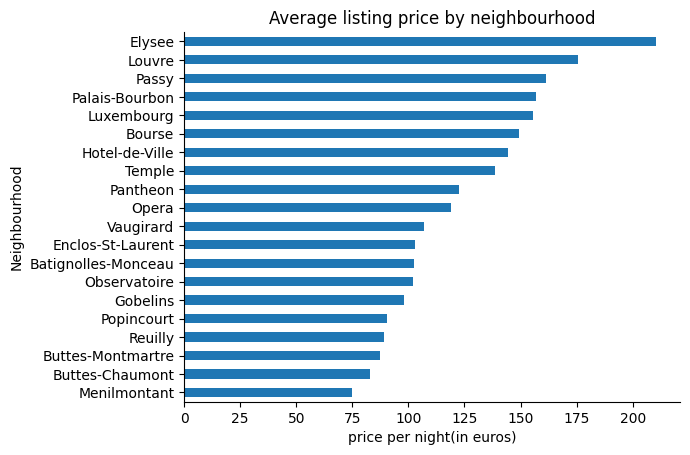

In [12]:
#objective3:
#bar chart for average rent price by neighbourhood.which neighbourhod stands out?
import seaborn as sns
(paris_listings_neighbourhood
 .plot
 .barh(
   title="Average listing price by neighbourhood",
   xlabel="price per night(in euros)",
   ylabel="Neighbourhood",
   legend=None
 ))
sns.despine()

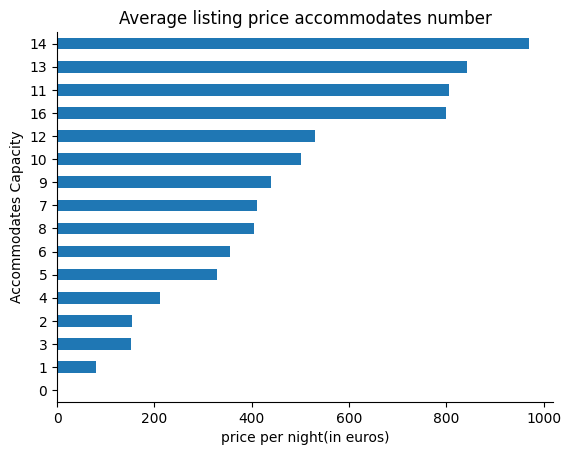

In [13]:
##bar chart for average rent price by accommodates number.
import seaborn as sns
(paris_listings_accommodates
 .plot
 .barh(
   title="Average listing price accommodates number",
   xlabel="price per night(in euros)",
   ylabel="Accommodates Capacity",
   legend=None
 ))
sns.despine()

<Axes: title={'center': 'new airbnb host over the time'}, xlabel='host_since', ylabel='new hosts'>

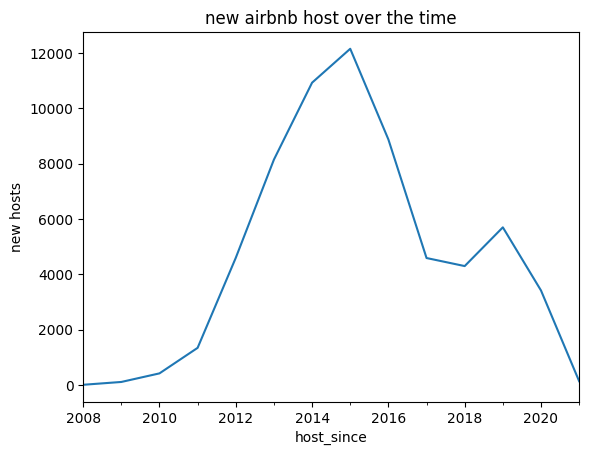

In [14]:
#create two line charts:one to count new host over time .and to calculate average price make sure to set y axis to 0,add title and change axis as needed.
paris_listings_over_time["neighbourhood"].plot(
  ylabel="new hosts",
  title="new airbnb host over the time"
  
)

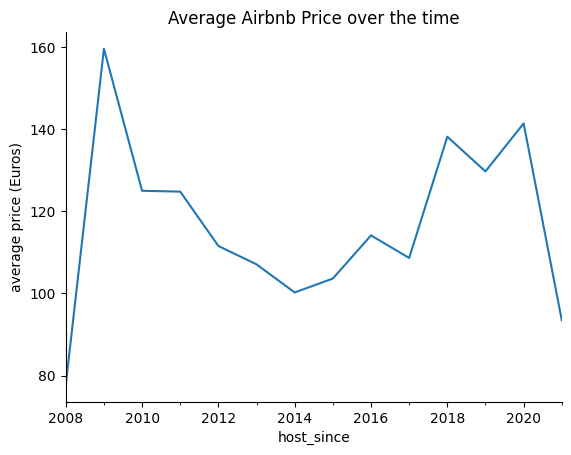

In [15]:
paris_listings_over_time["price"].plot(
  ylabel="average price (Euros)",
  title="Average Airbnb Price over the time"
  
)
sns.despine()

Text(0.5, 1.0, '2015 regulations lead to fewer new hosts and higher prices')

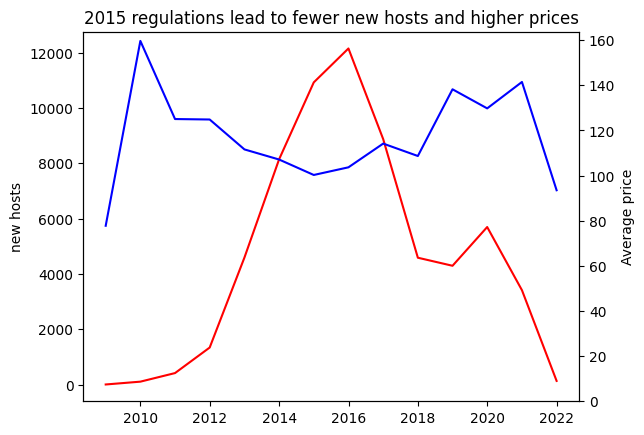

In [16]:
import matplotlib.pyplot as plt 
fig ,ax=plt.subplots()
ax.plot(
  paris_listings_over_time.index,
  paris_listings_over_time["neighbourhood"],
  label="new hosts",
  c="red"
)
ax.set_ylabel("new hosts")
ax2=ax.twinx()
ax2.plot(
  paris_listings_over_time.index,
  paris_listings_over_time["price"],
  label="Average price",
  c="blue"
)
ax2.set_ylim(0)
ax2.set_ylabel("Average price")
ax.set_title("2015 regulations lead to fewer new hosts and higher prices")

